# Import Necessary Libraries

In [1]:
# cv2: OpenCV library for image processing
# pytesseract: An OCR tool for character recognition
# re: The regex module to handle regular expressions
# numpy: A library for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
# matplotlib.pyplot: A plotting library used for 2D graphics in python programming language. It can be used in python scripts, shell, web application servers and other graphical user interface toolkits.
import cv2
import pytesseract
import re
import numpy as np
import matplotlib.pyplot as plt

# Set the Path to the Tesseract Executable

In [2]:
# Tesseract is an open-source tool for OCR (Optical Character Recognition) that can recognize text from images.
# Make sure to use the actual path on your system where the Tesseract executable is located.
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the Business Card Image

In [3]:
# cv2.imread() is a method in cv2 to read an image, the image should be in the working directory or a full path of image should be given.
image_path = 'business_card2.jpg'
image = cv2.imread(image_path)

# Extracting Text from Image, and Drawing Rectangle aorund the Text being Extracted and then Showing the Image.

Extracted Text:
LICERIA
COMPANY

DANI MARTINEZ

FINANCE MANAGER

@ 123-456-7890
www.reallygreatsite.com
© hello@reallygreatsite.com
Q 123 Anywhere St., Any City, ST 12345


L 232 798 254 834 0
I 257 798 264 834 0
C 269 797 301 834 0
E 306 798 330 834 0
R 335 798 362 834 0
I 367 798 374 834 0
A 377 798 410 834 0
C 230 744 263 781 0
O 266 744 301 782 0
M 306 745 343 781 0
P 349 745 376 781 0
A 377 745 409 781 0
N 413 745 442 781 0
Y 445 745 477 781 0
D 101 535 163 600 0
A 167 535 238 600 0
N 244 535 309 600 0
I 322 535 343 600 0
M 384 535 462 600 0
A 467 535 538 600 0
R 544 535 607 600 0
T 611 535 675 600 0
I 683 535 704 600 0
N 717 535 782 600 0
E 794 535 851 600 0
Z 855 535 918 600 0
F 96 467 127 506 0
I 126 467 174 506 0
N 172 467 206 506 0
A 190 467 222 507 0
N 210 467 246 506 0
C 248 467 284 507 0
E 285 467 317 506 0
M 330 467 374 506 0
A 372 467 406 506 0
N 410 467 446 506 0
A 444 467 478 506 0
G 484 467 520 507 0
E 523 467 555 506 0
R 554 467 586 506 0
@ 94 281 149 335 0
1 164 292

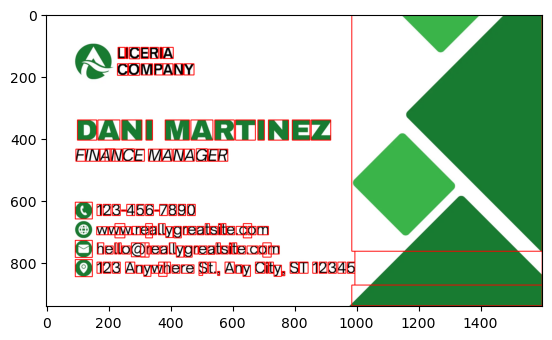

In [4]:
# Check if the image is loaded successfully
if image is None:
    print(f"Failed to load image at path: {image_path}")
else:
    # Convert the image to grayscale for better text detection
    # cv2.cvtColor() method is used to convert an image from one color space to another. Here we are converting the color image to grayscale.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment out the text from the background
    # cv2.threshold() function is used to apply the thresholding. The simplest method is to choose a threshold value, and then all pixel intensity values less than this threshold are converted to 0(black), and all pixels greater than this threshold are converted to maximum value(white).
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Use pytesseract to extract text from the image
    # image_to_string() is a pytesseract method which recognizes and reads the text embedded in images.
    text = pytesseract.image_to_string(thresh)

    # Print the extracted text
    # The recognized text is printed on the console.
    print("Extracted Text:")
    print(text)

    # Get the bounding box coordinates for each character
    # pytesseract.image_to_boxes() function is used to get the bounding box coordinates for each detected character in the image.
    h, w = thresh.shape
    boxes = pytesseract.image_to_boxes(thresh)
    print(boxes)
    for b in boxes.splitlines():
        b = b.split(' ')
        # Draw bounding boxes around each character
        # cv2.rectangle() method is used to draw a rectangle on any image.
        image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 0, 255), 2)

    # Display the image with bounding boxes using matplotlib
    # plt.imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
    # cv2.cvtColor() method is used to convert an image from one color space to another. Here we are converting the BGR image to RGB.
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
